In [4]:
from dotenv import load_dotenv
import os

# Load variables from .env file into environment
load_dotenv()

True

In [ ]:
import os

API_KEYS = ['GROQ_API_KEY','GROQ_YOUTUBE_COLLAB','HUGGINGFACE_TOKEN','LANGCHAIN_API_KEY','LANGCHAIN_PROJECT','HF_TOKEN','GOOGLE_API_KEY']
for k in API_KEYS:
  value = os.getenv(k)
  if k is not None:
    keys = f'{k} : {os.getenv(k)}'
    os.environ[k] = value
    print(keys)
  else:
        print(f"{k} not found in userdata")

In [6]:
!pip install langchain_community langchain langchain-openai langchain-core langchain-community bs4 faiss-cpu pypdf arxiv pymupdf wikipedia lxml langchain_huggingface langchain-groq faiss langgraph


ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss

[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
%pip install --upgrade --quiet  langchain-google-genai

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
!pip install langchain_groq


[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from typing import Union
from langchain_groq import ChatGroq
def multiply(a: Union[int, str], b: Union[int, str]) -> int:
    '''
    Multiply a and b.

    Args:
        a: First number (int or str representing int)
        b: Second number (int or str representing int)

    Returns:
        Product as an integer.
    '''
    return int(a) * int(b)


def add(a: Union[int, str], b: Union[int, str]) -> int:
    '''
    Add a and b.

    Args:
        a: First number (int or str representing int)
        b: Second number (int or str representing int)

    Returns:
        Sum as an integer.
    '''
    return int(a) + int(b)


def divide(a: Union[int, str], b: Union[int, str]) -> int:
    '''
    Divide a by b.

    Args:
        a: Numerator (int or str representing int)
        b: Denominator (int or str representing int)

    Returns:
        Quotient as a float.

    Raises:
        ValueError: If b is zero.
    '''
    a, b = int(a), int(b)
    if b == 0:
        raise ValueError("Division by zero is not allowed.")
    return a / b


def subtract(a: Union[int, str], b: Union[int, str]) -> int:
    '''
    Subtract b from a.

    Args:
        a: First number (int or str representing int)
        b: Second number (int or str representing int)

    Returns:
        Difference as an integer.
    '''
    return int(a) - int(b)


In [10]:
tools=[add,multiply,divide,subtract]

llm = ChatGroq(model='Llama3-8b-8192')
llm_with_tools = llm.bind_tools(tools,parallel_tool_calls = False)

In [11]:
pip install langgraph


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from langgraph.graph.message import add_messages
from typing import Annotated
from langchain_core.messages import AnyMessage
from typing_extensions import TypedDict

class MessagesState(TypedDict):
  messages: Annotated[list[AnyMessage],add_messages]

In [13]:
from langchain_core.messages import HumanMessage,SystemMessage
sys_msg = SystemMessage(content = 'You are a helpful assistant tasked with performing arithmetic set of inputs.You know well about BODMAS techniques.')

def assistant(state: MessagesState):
  return {"messages":[llm_with_tools.invoke([sys_msg]+state['messages'])]}

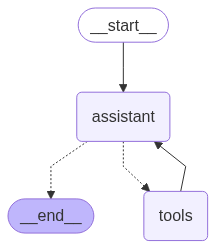

In [14]:
from langgraph.graph import START,END,StateGraph
from langgraph.prebuilt import tools_condition, ToolNode
from IPython.display import Image,display
builder = StateGraph(MessagesState)
# define thenode
builder.add_node('assistant',assistant)
builder.add_node('tools',ToolNode(tools))

# define the edges
builder.add_edge(START,'assistant')
builder.add_conditional_edges(
    'assistant',
    # if the latest message (result) from the assistant is a tool call -> tolls _condition routes to tools
    # if the latest message (result) from the assistant is not a tool call -> tool_condition routes to END.
    tools_condition
)

builder.add_edge('tools','assistant')

react_graph = builder.compile()

# Show
display(Image(react_graph.get_graph().draw_mermaid_png()))


In [15]:
messages = [HumanMessage(content = 'Add 10 and 14. Multiply the output by 2, Divide the ouput by 3. Subtract the output by -1.' )]

messages = react_graph.invoke({'messages':messages})

In [16]:
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Add 10 and 14. Multiply the output by 2, Divide the ouput by 3. Subtract the output by -1.
================================== Ai Message ==================================
Tool Calls:
  add (rjg5hw25p)
 Call ID: rjg5hw25p
  Args:
    a: 10
    b: 14
================================= Tool Message =================================
Name: add

24
================================== Ai Message ==================================
Tool Calls:
  multiply (wma4akexk)
 Call ID: wma4akexk
  Args:
    a: 24
    b: 2
================================= Tool Message =================================
Name: multiply

48
================================== Ai Message ==================================
Tool Calls:
  divide (x8tgf2tsf)
 Call ID: x8tgf2tsf
  Args:
    a: 48
    b: 3
================================= Tool Message =================================
Name: divide

16.0
================================== Ai Message ===

In [17]:
messages = [HumanMessage(content = ' Multiply the output by 2.' )]

messages = react_graph.invoke({'messages':messages})
for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

 Multiply the output by 2.
================================== Ai Message ==================================
Tool Calls:
  multiply (t3q4yzkcq)
 Call ID: t3q4yzkcq
  Args:
    a: 1
    b: 2
================================= Tool Message =================================
Name: multiply

2
================================== Ai Message ==================================
Tool Calls:
  multiply (0rtaa37cz)
 Call ID: 0rtaa37cz
  Args:
    a: 2
    b: 2
================================= Tool Message =================================
Name: multiply

4
================================== Ai Message ==================================
Tool Calls:
  multiply (2z7s42jz1)
 Call ID: 2z7s42jz1
  Args:
    a: 4
    b: 2
================================= Tool Message =================================
Name: multiply

8
================================== Ai Message ==================================
Tool Calls:
  multiply (gk4

# Memore in Agents ( MemorySaver())

> 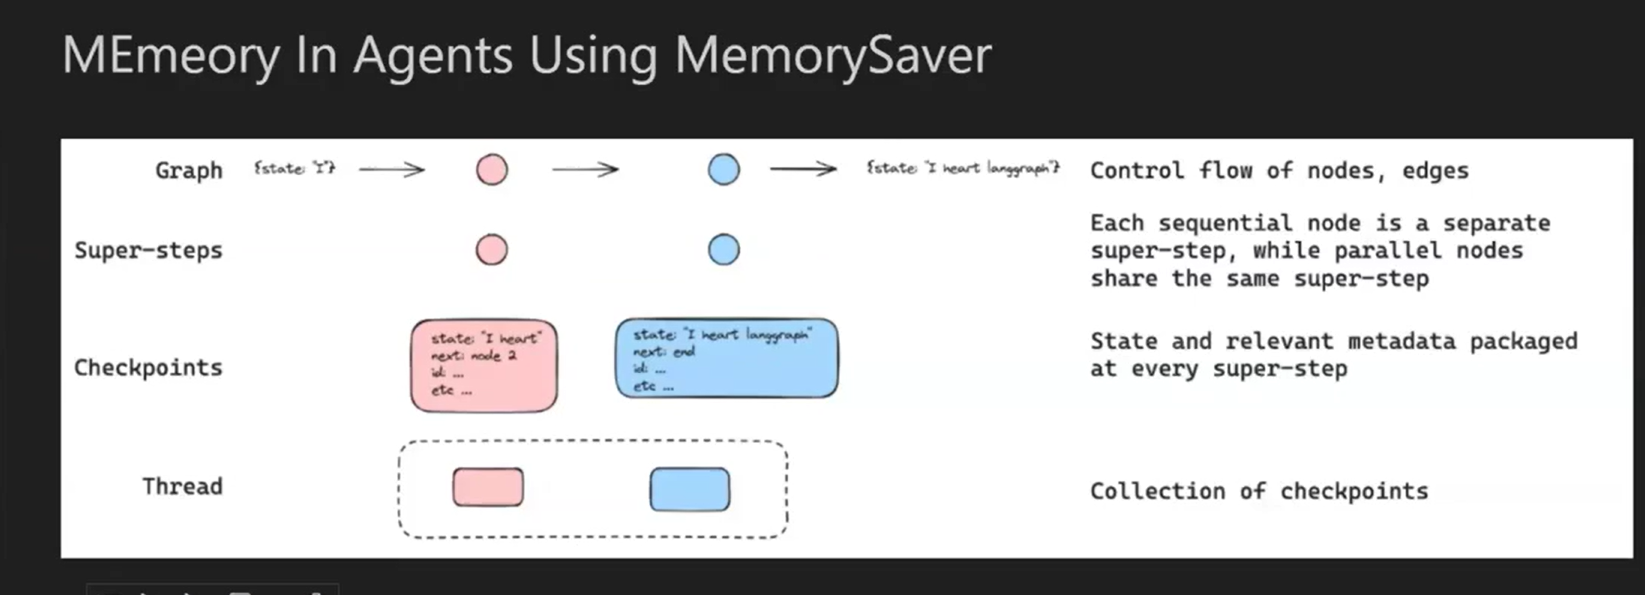

In [18]:
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

react_graph = builder.compile(checkpointer=memory)

In [19]:
config={"configurable":{"thread_id":"1"}}
messages = [HumanMessage(content= 'Add 10 and 14. Multiply the output by 2, Divide the ouput by 3. Subtract the output by -1.')]

# run
messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
  m.pretty_print()

BadRequestError: Error code: 400 - {'error': {'message': "Failed to call a function. Please adjust your prompt. See 'failed_generation' for more details.", 'type': 'invalid_request_error', 'code': 'tool_use_failed', 'failed_generation': 'I apologize for the mistake. It seems that the tool is expecting integer values instead of floating-point numbers. Here is a revised tool call that uses the "multiply" function with integer values:\n\n<tool-use>{"tool_call":{"id":"vxxybwpsw","type":"function","function":{"name":"multiply"},"parameters":{"a":16,"b":2"}}}</tool-use>'}}

In [ ]:
messages = [HumanMessage(content= 'Multiply the putpuit by 44.')]

# run
messages = react_graph.invoke({"messages":messages},config)

for m in messages['messages']:
  m.pretty_print()

================================ Human Message =================================

Multiply the output by 44
================================== Ai Message ==================================
Tool Calls:
  multiply (mpnhsenpw)
 Call ID: mpnhsenpw
  Args:
    a: 1
    b: 1
================================= Tool Message =================================
Name: multiply

1
================================== Ai Message ==================================
Tool Calls:
  multiply (mqhxrwj1d)
 Call ID: mqhxrwj1d
  Args:
    a: 44
    b: 1
================================= Tool Message =================================
Name: multiply

44
================================== Ai Message ==================================

44
================================ Human Message =================================

Add 10 and 14. Multiply the output by 2, Divide the ouput by 3. Subtract the output by -1.
================================== Ai Message ==================================
Tool Calls:
  add (qky7qkjvc)